# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

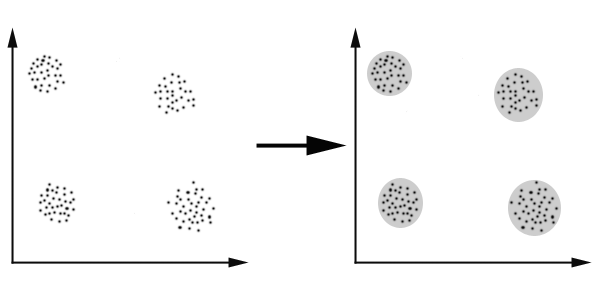

这个算法其实很简单，如下图所示：

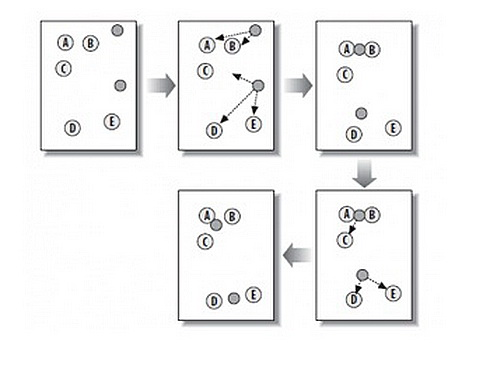

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

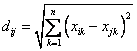


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

In [1]:
from sklearn.cluster import KMeans

In [ ]:
# n_clusters=8 即K
# init='k-means++'选择初始种子点的算法
KMeans()

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

导包，使用make_blobs生成随机点cluster_std

In [4]:
from sklearn.datasets import make_blobs

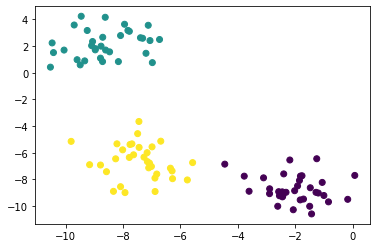

In [5]:
data, target = make_blobs()
plt.scatter(data[:, 0], data[:, 1], c=target)

In [8]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [9]:
# 训练好了之后,就有了训练数据的标签
kmeans.labels_

array([2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2])

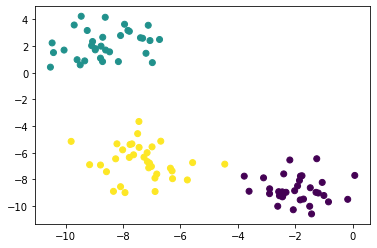

In [10]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)

In [12]:
# 聚类中心点
centers = kmeans.cluster_centers_

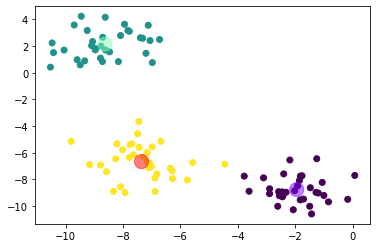

In [13]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, cmap='rainbow', c=[0, 1, 2])

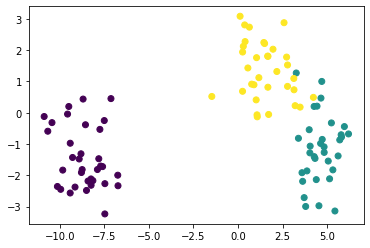

In [24]:
# 预测
x_test, y_test = make_blobs()
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

In [25]:
y_ = kmeans.predict(x_test)

In [21]:
y_

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1])

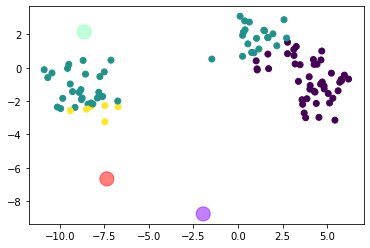

In [26]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, cmap='rainbow', c=[0, 1, 2])

建立模型,训练数据，并进行数据预测，使用相同数据

无监督的情况下进行计算，预测
现在机器学习没有目标

绘制图形，显示聚类结果kmeans.cluster_centers

### 2、 实战，三问中国足球几多愁？

导包，3D图像需导包：from mpl_toolkits.mplot3d import Axes3D  
读取数据

In [31]:
football = pd.read_csv('../../data/AsiaFootball.txt', header=None, names=["国家","2006世界杯","2010世界杯","2007亚洲杯"])
football

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

使用K-Means进行数据处理，对亚洲球队进行分组，分三组

In [32]:
kmeans = KMeans(3)
kmeans.fit(football.iloc[:, 1:])

KMeans(n_clusters=3)

for循环打印输出分组后的球队，argwhere()

In [33]:
kmeans.labels_

array([1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [37]:
country = football.国家.values

In [40]:
country[kmeans.labels_ == 2]

array(['日本', '韩国'], dtype=object)

In [42]:
np.argwhere(kmeans.labels_ == 0).ravel()

array([ 3,  4,  8, 12, 13], dtype=int64)

In [48]:
for i in range(3):
    index = np.argwhere(kmeans.labels_ == i).ravel()
    print(i, end=' ')
    for j in index:
        print(country[j], end=' ')
    print()

0 伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 
1 中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 
2 日本 韩国 


绘制三维立体图形,ax = plt.subplot(projection  = '3d')  
ax.scatter3D()

In [51]:
centers = kmeans.cluster_centers_

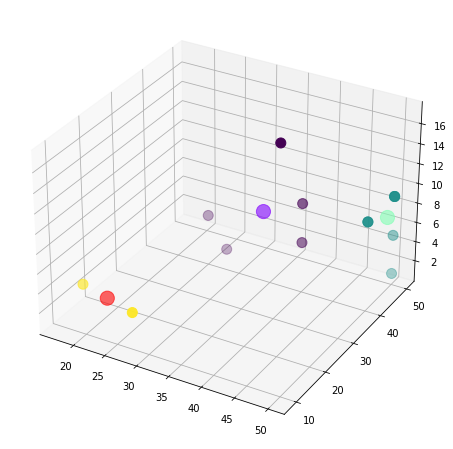

In [54]:
plt.figure(figsize=(8, 8))
axes = plt.subplot(projection='3d')
axes.scatter3D(football.iloc[:, 1], football.iloc[:, 2], football.iloc[:, 3], s=100, c=kmeans.labels_)
axes.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], cmap='rainbow', c=[0, 1, 2], s=200, alpha=0.6)

### 3、聚类实践与常见错误

导包，使用make_blobs创建样本点

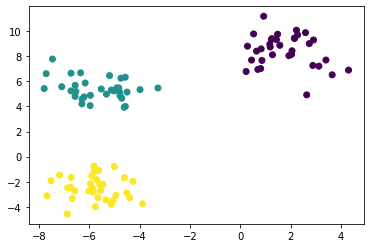

In [55]:
data, target = make_blobs()
plt.scatter(data[:, 0], data[:, 1], c=target)

第一种错误，k值不合适，make_blobs默认中心点三个

In [56]:
kmeans = KMeans(4)
kmeans.fit(data, target)

KMeans(n_clusters=4)

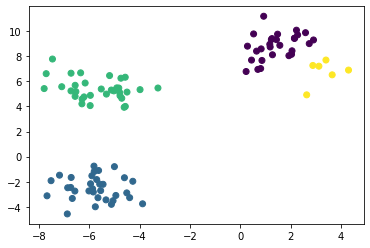

In [57]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

In [58]:
trans = [[0.6,-0.6],[-0.4,0.8]]
data_trans = np.dot(data, trans)

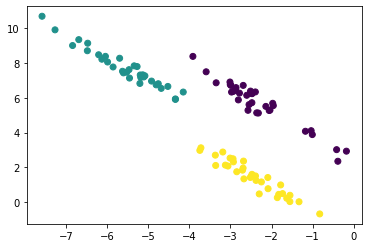

In [59]:
plt.scatter(data_trans[:, 0], data_trans[:, 1], c=target)

In [60]:
kmeans = KMeans(3)
kmeans.fit(data_trans)

KMeans(n_clusters=3)

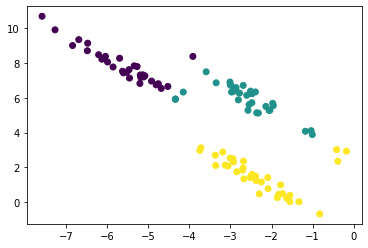

In [61]:
plt.scatter(data_trans[:, 0], data_trans[:, 1], c=kmeans.labels_)

In [ ]:
data_trans . trans^-1 = data . trans . trans^-1

In [62]:
data = np.dot(data_trans, np.linalg.inv(trans))

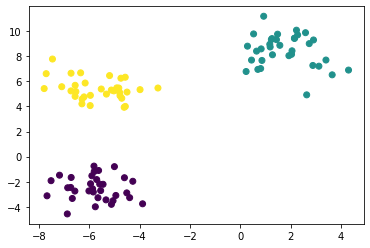

In [63]:
kmeans = KMeans(3)
kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)

第三个错误:标准偏差不相同cluster_std

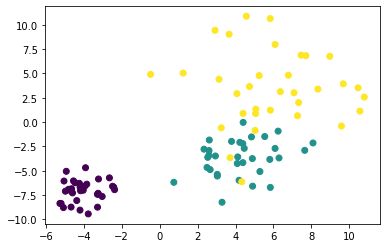

In [64]:
data, target = make_blobs(cluster_std=[1, 2, 3])
plt.scatter(data[:, 0], data[:, 1], c=target)

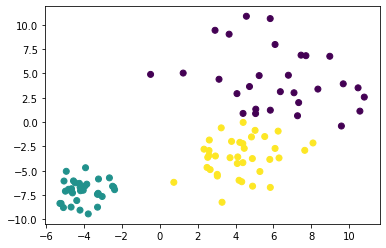

In [65]:
kmeans = KMeans(3)
kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)

第四个错误：样本数量不同

In [67]:
n1 = np.random.randn(50, 2) + (2, 2)
n2 = np.random.randn(300, 2) + (-2, 2)
n3 = np.random.randn(600, 2) + (-2, -2)
data = np.vstack((n1, n2, n3))

In [68]:
target = [0] * 50 + [1] * 300 + [2] * 600

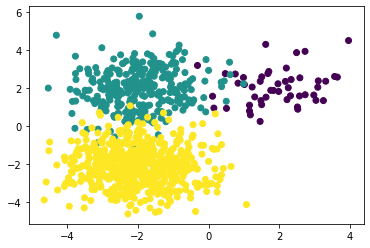

In [69]:
plt.scatter(data[:, 0], data[:, 1], c=target)

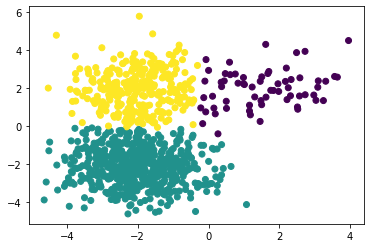

In [70]:
kmeans = KMeans(3)
kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)

### 4、K-Means图片颜色点分类

加载图片/创建模型/训练数据/获取labels

In [1]:
from sklearn.datasets import load_sample_image

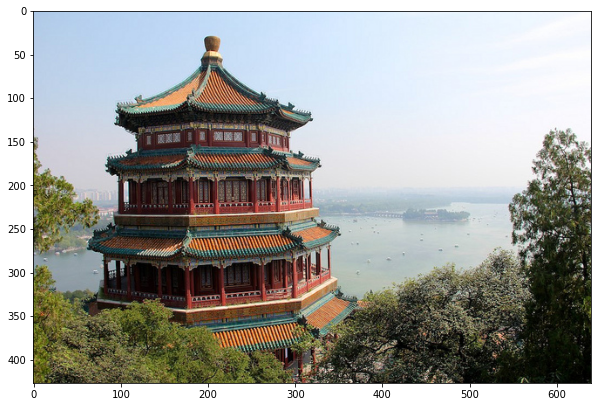

In [5]:
image = load_sample_image(image_name='china.jpg')
plt.figure(figsize=(10, 8))
plt.imshow(image)

In [6]:
from pandas import DataFrame

In [9]:
image.shape

(427, 640, 3)

In [11]:
image.reshape(-1, 3).shape

(273280, 3)

In [7]:
df = DataFrame(data=image.reshape(-1, 3))

In [83]:
# 这么多像素点的颜色是重复的.
df.duplicated().sum()

176665

In [85]:
# 96615种不重复颜色.
(~df.duplicated()).sum()

96615

In [77]:
image.reshape(-1, 3)

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

In [ ]:
# 图片中有多少种不同的颜色


In [13]:
data = image.reshape(-1, 3).copy()

In [15]:
data.shape

(273280, 3)

In [16]:
# 对颜色进行聚类.
kmeans = KMeans(64)
kmeans.fit(data)

KMeans(n_clusters=64)

In [17]:
# 因为计算量大, 所以对原始样本进行采样. 先打乱数据,然后进行无放回的采样.
from sklearn.utils import shuffle

In [18]:
data_shuffled = shuffle(data)

In [19]:
kmeans = KMeans(128)
kmeans.fit(data_shuffled[:1000])


KMeans(n_clusters=128)

In [20]:
kmeans.labels_

array([ 41,  41,  37,  99,  26,  67,  50,  83,  62,   3,   3, 111,  35,
        17, 116,  63,  54,  28,  26,  96,  64,  39,  16,  65,  45,  88,
         9,  18,  67,  67, 105,   1,  65,  34,  82,  81,  96, 123,  65,
       122, 116,  63,  15, 104, 118,  14,  55,  26,  21,  96,  28,  34,
        26,  55,  42, 127,  29,  26,  45,  73, 104, 116,  65,  39,  74,
        66,  74,  53,  92,  37,  66,  50,   1, 108,  85,  28,  39,  63,
        83,  26,  38,  65,  61,  88, 117,  66, 116,  86,  96,  29,  17,
        54,  45,  29, 125, 113,   4,  71,  65,  65,  18, 104, 120,   4,
         3,   3,  74,  58,   1,  96, 104,  14,  22,   0,  44,  65,  84,
        17,  92,  67,   7, 108,  20, 104,  99,  28,  48,   4,  28,  28,
         7,  68,  39,   3,  83,  61,  66,  67,   9,  65, 116,   4,  77,
        53,  58, 124,  51,  63,  26,   5,  30,   0,  72,  52,  44, 121,
         4,   3,   1, 116,  10,  45, 104,  57,  72,   3,  27,  66,  23,
        54,  28, 113,  24,  18, 127,  61,   1,  44, 114,  29,  1

In [21]:
main_colors = kmeans.cluster_centers_

In [34]:
main_colors

array([[ 75.55555556,  36.88888889,  34.77777778],
       [193.36363636, 211.22727273, 231.68181818],
       [134.2       , 133.6       ,  63.        ],
       [235.54054054, 243.86486486, 254.21621622],
       [ 16.71428571,  18.95238095,  11.76190476],
       [ 98.4       ,  97.8       ,  84.6       ],
       [165.33333333, 167.        , 154.66666667],
       [213.75      , 154.75      , 117.        ],
       [ 88.25      ,  84.625     ,  45.125     ],
       [175.14285714, 187.42857143, 197.85714286],
       [143.66666667, 135.66666667,  91.66666667],
       [ 61.63636364,  63.72727273,  51.90909091],
       [ 44.22222222,  46.55555556,  32.88888889],
       [150.        , 106.5       ,  67.5       ],
       [214.76190476, 232.61904762, 251.95238095],
       [149.2       ,  61.6       ,  61.2       ],
       [ 39.18181818,  26.45454545,  26.90909091],
       [230.4375    , 231.25      , 235.        ],
       [210.        , 207.61538462, 214.53846154],
       [132.66666667, 140.66666

In [22]:
y_ = kmeans.predict(data)

In [23]:
np.unique(y_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [24]:
image.shape

(427, 640, 3)

In [25]:
main_colors[[y_]].reshape(427, 640, 3)

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[[179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        ...,
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514]],

       [[179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        ...,
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514]],

       [[179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        ...,
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514]],

       ...,

      

In [33]:
main_colors[y_].reshape(427, 640, 3)

array([[[179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        ...,
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514]],

       [[179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        ...,
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514]],

       [[179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        [179.44444444, 205.55555556, 232.77777778],
        ...,
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514],
        [249.51351351, 249.56756757, 254.13513514]],

       ...,

      

(-0.5, 639.5, 426.5, -0.5)

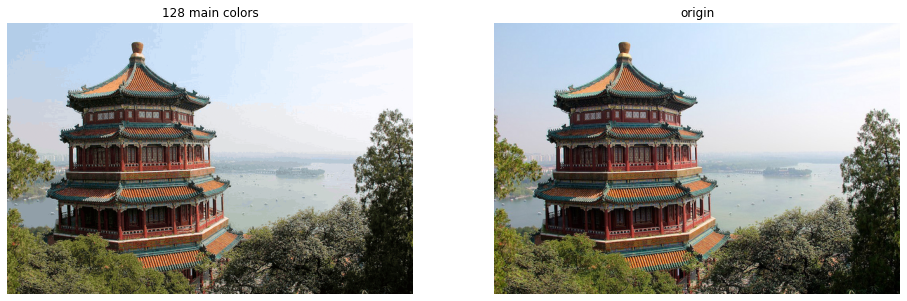

In [26]:
# 看一下用64种颜色重新生成的图片.
plt.figure(figsize=(2 * 8, 5))
axes1 = plt.subplot(1, 2, 1)
axes1.imshow(main_colors[y_].reshape(427, 640, 3) / 255.0)
axes1.set_title('128 main colors')
axes1.axis('off')

axes2 = plt.subplot(1, 2, 2)
axes2.imshow(image)
axes2.set_title('origin')
axes2.axis('off')

In [27]:
# 可以变压缩图片
plt.imsave('china.png', image)

In [28]:
plt.imsave('new_china.png', main_colors[y_].reshape(427, 640, 3) / 255.0)

In [29]:
# 创建新图片的一般思路: 创建一个和原图片大小一致的空白图片, 然后取出每个像素点的颜色, 进行赋值, 遍历所有的像素点即可.
def create_new_image(w, h, main_colors, labels):
    # 创建空白图片
    blank = np.ones(shape=(w, h, 3))
    # 遍历每个像素点
    counter = 0
    for i in range(w):
        for j in range(h):
            index = labels[counter]
            color = main_colors[index]
            blank[i, j] = color
            counter += 1
    return blank / 255.0

In [30]:
image.shape

(427, 640, 3)

In [31]:
new_image = create_new_image(427, 640, main_colors, y_)

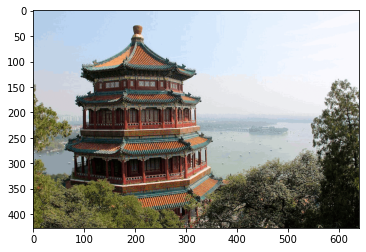

In [32]:
plt.imshow(new_image)

使用pairwise_distances_argmin算法生成随机labels

创造方法，重新合成图片

数据可视化

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`

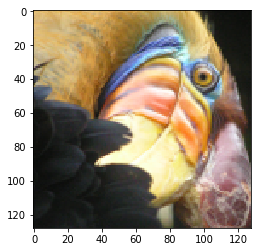

In [4]:
plt.imshow(bird)